In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rc('axes', labelsize=14)
#mpl.rc('xtick', labelsize=12)
#mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "project_report"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import zipfile
import urllib

DOWNLOAD_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/00507/"
WISDM_PATH = os.path.join("datasets", "wisdm")
WISDM_URL = DOWNLOAD_ROOT + "wisdm-dataset.zip"

def fetch_wisdm_data(wisdm_url=WISDM_URL, wisdm_path=WISDM_PATH):
    if not os.path.isdir(wisdm_path):
        os.makedirs(wisdm_path)
    zip_path = os.path.join(wisdm_path, "wisdm-dataset.zip")
    if not os.path.isfile(zip_path):
        urllib.request.urlretrieve(wisdm_url, zip_path)
    uncompressed_path = os.path.join(wisdm_path, "wisdm-dataset")
    if not os.path.isdir(uncompressed_path):
        with zipfile.ZipFile(zip_path,"r") as zip_ref:
            zip_ref.extractall(wisdm_path)

In [3]:
fetch_wisdm_data()

In [4]:
def load_raw_wisdm_data(subjectId, device, sensor, wisdm_path=WISDM_PATH):
    """
        Charge les données brutes.
        device : 'phone' ou 'watch'
        sensor : 'accel' ou 'gyro'
    """
    subjectIdStr = str(subjectId)
    rawPath = os.path.join(WISDM_PATH,'wisdm-dataset','raw',device,sensor,'data_'+subjectIdStr+'_'+sensor+'_'+device+'.txt')
    f = open(rawPath, 'r')
    lines = f.readlines()
    data=[[],[],[]]
    timestamp=[]
    series={}
    activities=[]
    for l in lines:
        spt=l.split(',')
        activities.append(spt[1])
        data[0].append(float(spt[3]))
        data[1].append(float(spt[4]))
        data2=spt[5].split(';')[0]
        data[2].append(float(data2))
        timestamp.append(int(spt[2]))
    f.close()
    #d={'activity': activities, 'x': data[0], 'y': data[1], 'z': data[2]}
    d={'time': timestamp, 'activity': activities, 'x': data[0], 'y': data[1], 'z': data[2]}
    df=pd.DataFrame(data=d, index=pd.to_datetime(timestamp))
    #df=pd.DataFrame(data=d)
    
    activities = df['activity'].unique()
    for activity in activities:
        serie = df.loc[df['activity']==activity]
        timestamp=serie['time'].to_numpy()
        timestamp = [(x-timestamp[0])*10**-9 for x in timestamp]
        df.loc[df['activity']==activity, 'time']=timestamp
    return df

In [5]:
# library for reading arff file
# You can install it via 'pip install liac-arff'
# https://pypi.org/project/liac-arff/ for more informations
import arff
import pandas as pd

def load_wisdm_data(subjectId, device, sensor, wisdm_path=WISDM_PATH):
    """
        Charge les données pré-traitées.
        device : 'phone' ou 'watch'
        sensor : 'accel' ou 'gyro'
    """
    subjectIdStr = str(subjectId)
    arffPath = os.path.join(WISDM_PATH,'wisdm-dataset','arff_files',device,sensor,'data_'+subjectIdStr+'_'+sensor+'_'+device+'.arff')
    f=open(arffPath, 'r')
    data = arff.load(f)
    attributesName = [data['attributes'][i][0] for i in range (len(data['attributes']))]
    dataFrame = pd.DataFrame(data = data['data'], columns=attributesName)
    f.close()
    return dataFrame

In [79]:
import random
import pandas as pd

SUBJECT_NUMBER = 51
FIRST_SUBJECT_ID=1600
SUBJECTSID = [i+FIRST_SUBJECT_ID for i in range(SUBJECT_NUMBER)]
#Le sujet 1614 n'est pas dans la liste ...
SUBJECTSID.remove(1614)

def load_all_wisdm_data(device, sensor):

    subject = load_wisdm_data(1600, device, sensor) 
    subjectsDf = pd.DataFrame(columns=subject.columns)
    for e in SUBJECTSID:
        subjectDf = load_wisdm_data(e, device, sensor)
        subjectsDf = subjectsDf.append(subjectDf)
    return subjectsDf

# Figure 5

Saving figure Figure 5


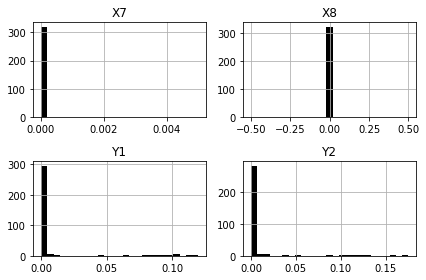

In [41]:
subject1600_phone_accel = load_wisdm_data(1600, 'phone', 'accel')

features_to_keep = ['X7','X8','Y1','Y2']

subject1600_phone_accel[features_to_keep].hist(bins = 25, color = "black")
save_fig("Figure 5")
plt.show()

# Figure 6

Saving figure Figure 6


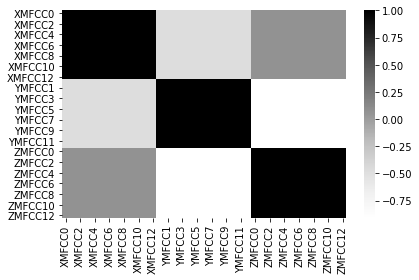

In [35]:
corr_matrix = subject1600_phone_accel.corr()
corr_matrix = corr_matrix**2

elements1=['XMFCC','YMFCC','ZMFCC']
attributes=[e+str(i) for e in elements1 for i in range (0,13)]

power_spectrum_corr=corr_matrix[attributes].loc[attributes]

fig = plt.subplots()
heat_map = sns.heatmap(power_spectrum_corr.corr(),cmap='Greys')

save_fig("Figure 6")

plt.show()

# Figure 7

Saving figure Figure 7


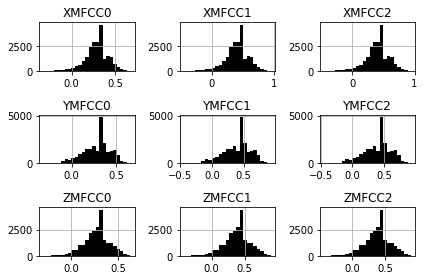

In [80]:
subjects_phone_accel = load_all_wisdm_data('phone', 'accel')

t1=['XMFCC','YMFCC','ZMFCC']
features_to_keep=[e+str(i) for e in t1 for i in range (0,3)]

subjects_phone_accel[features_to_keep].hist(bins = 25, color='black')

save_fig("Figure 7")

plt.show()

# Figure 8

Saving figure Figure 8


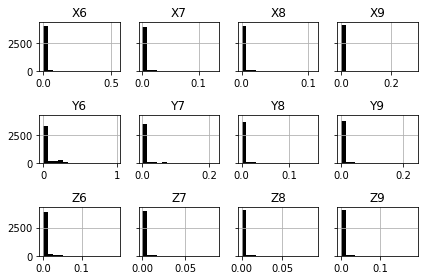

In [69]:
subject1600_phone_accel = load_wisdm_data(1600, 'phone', 'accel')

t2=['X','Y','Z']
features_to_keep=[e+str(i) for e in t2 for i in range (6,10)]

fig, ax = plt.subplots(3, 4, sharey='all')

m=0
for i in range(3):
    for j in range(4):

        subjects_phone_accel[features_to_keep].hist(column = subjects_phone_accel[features_to_keep].columns[m], bins = 15, ax=ax[i,j], color="black")
        m+=1

save_fig("Figure 8")
plt.show()

# Figure 9

Saving figure Figure 9


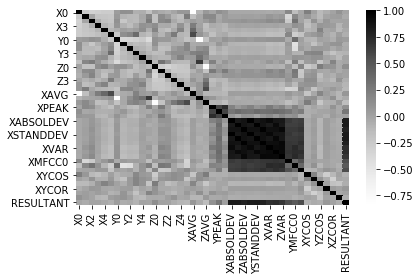

In [81]:
t1=['XMFCC','YMFCC','ZMFCC']
attributes1=[e+str(i) for e in t1 for i in range (1,13)]

t2=['X','Y','Z']
attributes2=[e+str(i) for e in t2 for i in range (6,10)]

attributes_to_drop=attributes1+attributes2
reducedSubjects_phone_accel1 = subjects_phone_accel.drop(attributes_to_drop, axis=1)

heat_map = sns.heatmap(reducedSubjects_phone_accel1.corr(), cmap='Greys')

save_fig("Figure 9")

plt.show()

In [83]:
t1=['XMFCC','YMFCC','ZMFCC']
attributes1=[e+str(i) for e in t1 for i in range (1,13)]
NOT_RELEVANT_FEATURES = {}
NOT_RELEVANT_FEATURES["similar"]=attributes1

t2=['X','Y','Z']
attributes2=[e+str(i) for e in t2 for i in range (6,10)]
NOT_RELEVANT_FEATURES["low_variance"]=attributes2

attributes3=['YABSOLDEV','ZABSOLDEV','XSTANDDEV','YSTANDDEV','ZSTANDDEV','XVAR','YVAR','ZVAR']
NOT_RELEVANT_FEATURES["correlated"]=attributes3

Feature ranking:


,feature_number,feature_name,importance
0,30,XAVG,0.0293
1,31,YAVG,0.0242
2,84,XYCOS,0.0238
3,90,RESULTANT,0.0210
4,86,YZCOS,0.0190
5,58,YMFCC0,0.0184
6,68,YMFCC10,0.0180
7,85,XZCOS,0.0175
8,69,YMFCC11,0.0168
9,67,YMFCC9,0.0168


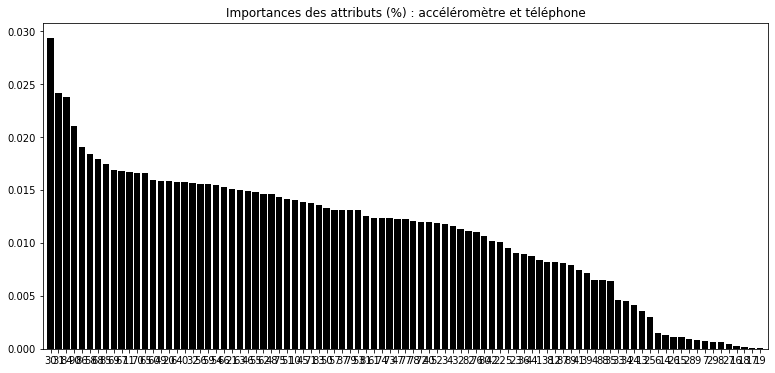

Saving figure Figure 10
Feature ranking:


,feature_number,feature_name,importance
0,0,X0,0.0268
1,30,XAVG,0.0261
2,84,XYCOS,0.0224
3,2,X2,0.0224
4,31,YAVG,0.0206
5,5,X5,0.0190
6,90,RESULTANT,0.0186
7,37,YABSOLDEV,0.0165
8,85,XZCOS,0.0157
9,10,Y0,0.0156


<Figure size 432x288 with 0 Axes>

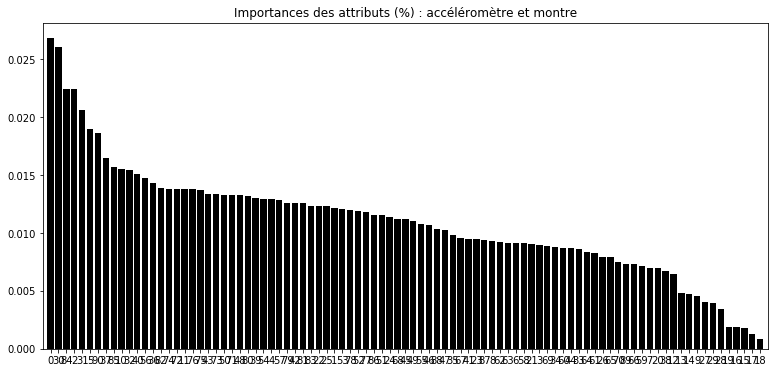

Saving figure Figure 11
Feature ranking:


,feature_number,feature_name,importance
0,44,ZVAR,0.0216
1,37,YABSOLDEV,0.0214
2,41,ZSTANDDEV,0.0214
3,88,XZCOR,0.0214
4,85,XZCOS,0.0208
5,90,RESULTANT,0.0202
6,40,YSTANDDEV,0.0193
7,38,ZABSOLDEV,0.0191
8,33,XPEAK,0.0190
9,66,YMFCC8,0.0172


<Figure size 432x288 with 0 Axes>

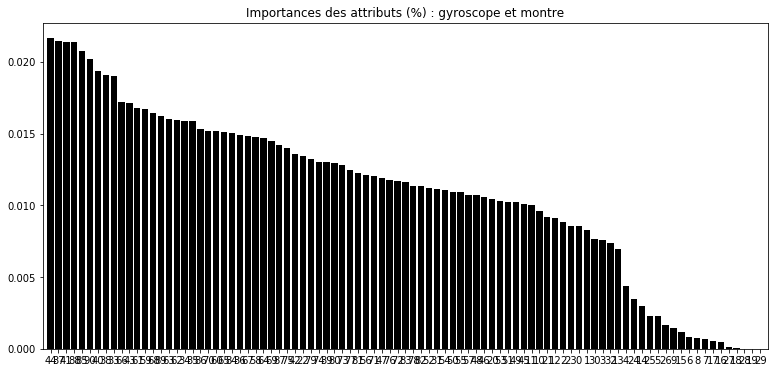

Saving figure Figure 12


<Figure size 432x288 with 0 Axes>

In [98]:
from sklearn.ensemble import ExtraTreesClassifier

globalImportances = np.array([])
features_to_drop=['ACTIVITY','class']
importances_by_device={}
pd.options.display.max_rows = 999

def toFrench(word):
    switcher={
                'phone':'téléphone',
                'watch':'montre',
                'accel':'accéléromètre',
                'gyro':'gyroscope'
             }
    return switcher.get(word)

i=10
for device in ['phone','watch']:
    for sensor in ['accel','gyro']:
        if(not(device=='phone' and sensor=='gyro')):
            for subjectId in SUBJECTSID:
                forest = ExtraTreesClassifier(n_estimators=100,
                                  random_state=0)

                subject = load_wisdm_data(subjectId, device, sensor)
                y=subject['ACTIVITY']
                X=subject.drop(features_to_drop, axis=1)

                forest.fit(X, y)


                importances = forest.feature_importances_

                #mean of importances
                if(len(globalImportances)==0):
                    globalImportances = importances
                else:
                    globalImportances = (globalImportances + importances) / 2.0

            indices = np.argsort(globalImportances)[::-1]

            #Les attributs restant triés par ordre d'importance
            SORTED_FEATURES=X.columns[indices]

            # Print the feature ranking
            print("Feature ranking:")

            df=pd.DataFrame()
            df['feature_number']=indices
            df['feature_name']=X.columns[indices]
            df['importance']=globalImportances[indices]
            df['importance']=df['importance'].map('{:,.4f}'.format)
            display(df)
            importances_by_device[device+'_'+sensor]=df

            # Plot the feature importances of the forest
            plt.figure(figsize=(13,6))
            plt.title("Importances des attributs (%) : "+toFrench(sensor)+' et '+toFrench(device))
            plt.bar(range(X.shape[1]), globalImportances[indices],
                   color="black", align="center")
            plt.xticks(range(X.shape[1]), indices)
            plt.xlim([-1, X.shape[1]])
            plt.show()
            save_fig("Figure "+str(i))
            i=i+1